In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## (1) Unit Norm Ball
##### (a)

In [2]:
def q1aNormPlot(p):
    x_end_points = list()
    y_end_points = list()
    counter1 = 0
    counter2 = 0
    for i in range(4000):
        x1 = np.random.rand()*2 - 1
        x2 = np.random.rand()*2 - 1
        k = np.power(np.power(abs(x1), p) + np.power(abs(x2), p), (1/p) )
        if ((k <= 1) and (k >= -1)):
            if (p == 0.4 or p == 1):
                if ((x1 >= 0.0 and x1 <= 0.05) and (x2 >= 0.45 and x2 <= 0.5) and counter1 < 1):
                    x_end_points.append(x1)
                    y_end_points.append(x2)
                    counter1 += 1
                if ((x1 >= 0.45 and x1 <= 0.5) and (x2 >= 0.0 and x2 <= 0.05) and counter2 < 1):
                #if (x1 == 0.01 and x2 == 0.5) or (x1 == 0.5 and x2 == 0.01):
                    x_end_points.append(x1)
                    y_end_points.append(x2)
                    counter2 += 1
            plt.plot(x1, x2, 'ro')
    plt.plot(x_end_points, y_end_points, 'bo-')
    plt.axis([-1.5, 1.5, -1.5, 1.5])
    plt.title("p = {}".format(p))
    plt.show()

Testing for multiple values 0 < p < 1 and p >= 1 on how plot looks

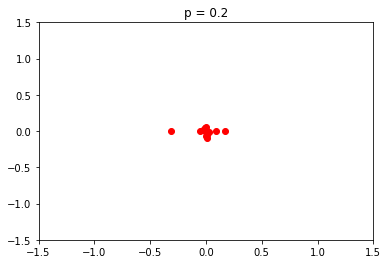

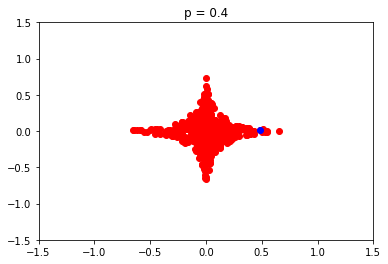

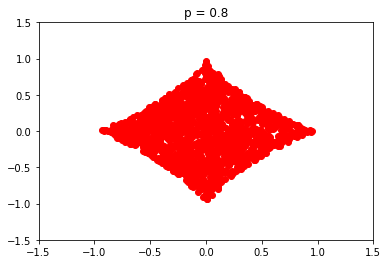

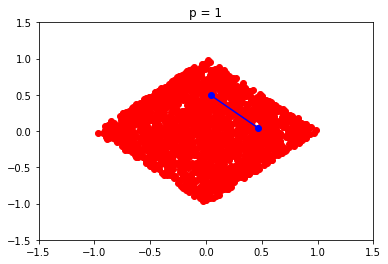

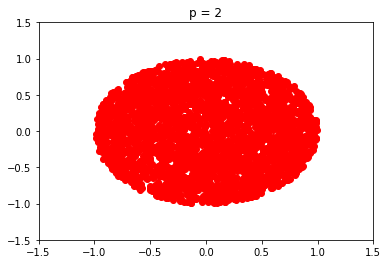

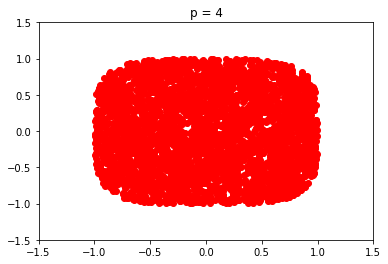

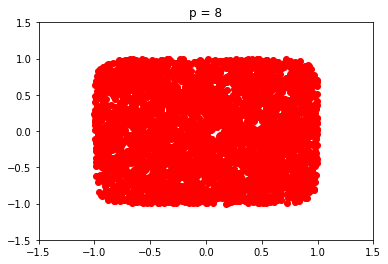

In [3]:
q1aNormPlot(0.2)
q1aNormPlot(0.4)
q1aNormPlot(0.8)
q1aNormPlot(1)
q1aNormPlot(2)
q1aNormPlot(4)
q1aNormPlot(8)

#### (b)
It is very much clear from the plot for p>=1 that the unit norm ball is convex. Taking an example, p = 1, We have a line(blue colored) created from the points that are present in unit norm ball and the line fully exists inside the unitnorm ball which also shows that for p>=1, it is very clear that the unit norm ball is convex. 
For integer 0<p<1, unit norm ball looks concave and using example line plot in p = 0.4, we can see that some part of the line (blue colored) exists outside the unit norm ball which proves that ball is concave not convex.

## (2) Completeness

Defining a sequence $x_{m}(t)$ of continuous functions on $[0, 1]$ by
$$ x_{n}(t)=   \left\{
\begin{array}{ll}
      0 & 0\leq t\leq \frac{1}{2} \\
      n(t - \frac{1}{2}) & \frac{1}{2}< t< (\frac{1}{2} + \frac{1}{n}) \\
      1 & (\frac{1}{2} + \frac{1}{n})\leq t\leq 1\\
\end{array} 
\right.  $$

In [26]:
def q2function1(n, x):
    y = list()
    for i in x:
        if i >= 0 and i <= 0.5:
            y.append(0)
        elif i > 0.5 and (i < (0.5 + (1/n))):
            y.append(n*(i - 0.5))
        elif (i >= (0.5 + (1/n))) and i <= 1:
            y.append(1)
    return y

def q2function2(x):
    y = list()
    for i in x:
        if i >= 0.0 and i <= 0.5:
            y.append(0)
        elif i > 0.5 and i <= 1:
            y.append(1)
    return y

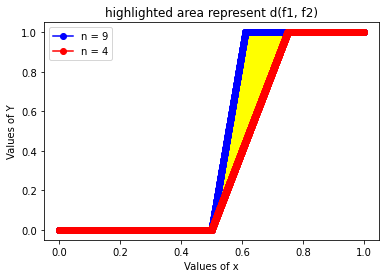

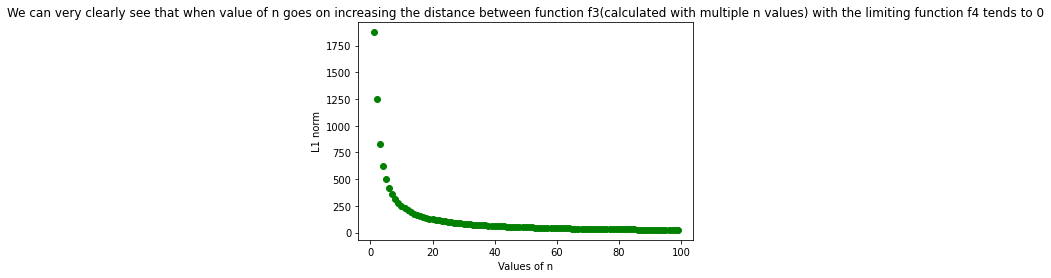

So the set of continous functions taken tend to very quickly change values under continuous values of input, which is impossible for a continuous function. So we can say that function taken does not converge which proves that (X, d) is not a complete metric space


In [27]:
x = np.linspace(0, 1, 5000)
y1 = q2function1(9, x) #f1 for n = 9
y2 = q2function1(4, x) #f2 for n = 4
plt.plot(x, y1, 'bo-', label="n = 9")
plt.plot(x, y2, 'ro-', label="n = 4")
plt.fill_between(x, y2, y1, color='yellow')
plt.title("highlighted area represent d(f1, f2)")
plt.xlabel("Values of x")
plt.ylabel("Values of Y")
plt.legend()
plt.show()

#lets try with larger value of n we know that distance d(f1, f2) between the functions will tend to 0
y4 = q2function2(x)
for j in range(1, 100):
    y3 = q2function1(j, x)
    temp = 0
    for i in range(len(x)):
        temp += abs(y3[i] - y4[i])
    plt.plot(j, temp, 'go-')
plt.title("We can very clearly see that when value of n goes on increasing the distance between function f3(calculated with multiple n values) with the limiting function f4 tends to 0")
plt.xlabel("Values of n")
plt.ylabel("L1 norm")
plt.show()
print("So the set of continous functions taken tend to very quickly change values under continuous values of input, which is impossible for a continuous function. So we can say that function taken does not converge which proves that (X, d) is not a complete metric space")

## (3) Entropy of Discrete RV
#### (a)

In [28]:
"""function for calculating the entropy of the input pmf
Args:
    pmf (np.ndarray): The probability mass function 
returns:
    h (float): entropy
"""
def q3aEntropy(pmf):
    pmf = pmf[pmf > 0]
    h = -np.sum(pmf * np.log2(pmf))
    if(h == -0.0):
        return np.abs(h)
    else:
        return h

"""
function to count the frequency of elements in a distribution X
Args:
    x (list): list of elements of distribution
returns:
    count (dictionary): dictionary with key as the element of the distribution and values as their frequency in distribution
"""
def q3aCounter(X):
    count = {}
    for i in X:
        if (i in count):
            count[i] +=1
        else:
            count[i] = 1
    return count

Please use below for manually giving elements in a distribution

In [29]:
X = [2, 2, 8] #elements in distribution
count = q3aCounter(X) #count the occurence of each element in distribution
total = float(np.sum(list(count.values())))
for key in count:
    count[key] /= total
pmf = np.array(list(count.values()))
ent = q3aEntropy(pmf)
print("Entropy: {} bits".format(ent))

Entropy: 0.9182958340544896 bits


Please use below by manually passing the dictionary with elements of distribution and their corresponding probabilities

In [30]:
import sys
X = {0.1: 0, 
     0.2: 0.2, 
     0.6: 0.8}
total = float(np.sum(list(X.values())))
if(total > 1):
    sys.exit("Sum of the probabilities for elements in distribution is greater than 1")
pmf = np.array(list(X.values()))
ent = q3aEntropy(pmf)
print("Entropy: {} bits".format(ent))

Entropy: 0.7219280948873623 bits


#### (b)

In [31]:
"""
function to plot the graph for different input values of p representing Bernoulli distribution
Args:
    p (list): list of values of p
returns:
    None
"""
def q3bBernPlot(p):
    max_i = 0
    max_ent = 0
    for i in p:
        k = q3aEntropy(np.array([i, 1 - i]))
        plt.plot(i, k, 'ro')
        if(max_ent < k):
            max_ent = k
            max_i = i
    plt.xlabel("values of p")
    plt.ylabel("entropy(bits)")
    plt.show()
    print("Maximum value of entropy is {} obtained at {} from given set p".format(max_ent, max_i))

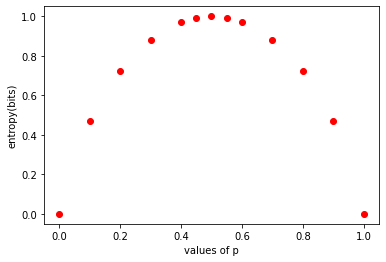

Maximum value of entropy is 1.0 obtained at 0.5 from given set p


In [32]:
p = [0, 0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.9, 1]
"""
#using below commands as the values are p are divided under equal intervals we donot find the element 0.5 to get the
#maximum values, so the maximum element always lies between 0.4 to 0.5
bins = 50
xrange = (0,1)
p = np.linspace(*xrange, bins)
"""
q3bBernPlot(p)

Plot attains maximum values at p=0.5 and the maximum values is 1.0

## (4) Image Entropy
#### (a)

In [33]:
def q4aNormHist(image):
    try:
        img = mpimg.imread(image)
        #img = Image.open(image)
    except FileNotFoundError:
        print("No image {} was found! Input file has to be in the same directory as this code is!".format(image))
        return False
    hist = np.zeros(img.shape[0], int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i][j]] += 1
    width = img.shape[0]
    height = img.shape[1]
    tot_px = width * height
    norm_hist = [value/tot_px for value in hist]
    return norm_hist

In [34]:
image = "5.1.09.tiff"
norm_hist = q4aNormHist(image)
#use below print command to view the normalized histogram for given image
#print("Normalized histogram for image {}: {}".format(image, norm_hist))

#### (b)

In [35]:
temp = {}
for i in ["09", "10", "11", "12", "13", "14"]:
    norm_hist1 = q4aNormHist("5.1.{}.tiff".format(i))
    ent = q3aEntropy(np.array(norm_hist1))
    temp[i] = ent
for key, val in temp.items():
    print("5.1.{}.tiff image entropy: {}".format(key, val))

5.1.09.tiff image entropy: 6.7093123359666365
5.1.10.tiff image entropy: 7.311807223259962
5.1.11.tiff image entropy: 6.452275232463875
5.1.12.tiff image entropy: 6.705667200666732
5.1.13.tiff image entropy: 1.548313696653812
5.1.14.tiff image entropy: 7.3424325128940096


From the above observations, we can say that higher value of entropy indicates an image with richer details. We can observe that  image number (09, 10, 11, 12 ,14) have higher value as they represent moon surface, aerial image, airplane, clock and chemical plant images. On the other hand, image number (13) contains most of the part to be white, resulting into lesser entropy value.

## (5) Joint PMF and Joint Entropy
#### (a)

In [14]:
def q5aNormJointHist(image1, image2):
    try:
        img1 = mpimg.imread(image1)
        img2 = mpimg.imread(image2)
    except FileNotFoundError:
        print("Either {} or {} or both were not found! Input file has to be in the same directory as this code is!".format(image1, image2))
        return False
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            img1[i][j] = int(img1[i][j]*256)
            img2[i][j] = int(img2[i][j]*256)
    width = 256
    height = 256
    hist = np.zeros((width, height), float)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            hist[int(img1[i][j])][int(img2[i][j])] += 1
    total = img1.shape[0] * img1.shape[1]
    for i in range(width):
        for j in range(height):
            hist[i][j] /= total
    
    #plot for the joint histogram
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    x = []
    y = []
    for i in range(hist.shape[0]):
        x.append(i)
        y.append(i)
    xpos, ypos = np.meshgrid(x, y, indexing="ij")
    n = 100
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
    return hist

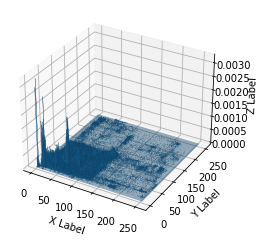

In [15]:
image1 = "left.png"
image2 = "right.png"
joint_pmf = q5aNormJointHist(image1, image2)
#use below to print the joint pmf
#print(joint_pmf)

#### (b)

In [16]:
def q5bJointEntropy(joint_pmf):
    h = 0
    for i in range(joint_pmf.shape[0]):
        for j in range(joint_pmf.shape[1]):
            if joint_pmf[i][j] == 0.0 :
                continue
            temp = -(joint_pmf[i][j] * np.log2(joint_pmf[i][j]))
            h += temp
    #joint_pmf = joint_pmf[joint_pmf > 0]
    #h = -np.sum(joint_pmf * np.log2(joint_pmf))
    if(h == -0.0):
        return np.abs(h)
    else:
        return h

#### (c)

In [17]:
ent = q5bJointEntropy(joint_pmf)
print("Joint Entropy for the joint PMF: {} bits".format(ent))

Joint Entropy for the joint PMF: 13.675203263376206 bits


## (6) Conditional PMF and Conditional Entropy
#### (a)

In [18]:
def q6aConditionalPMF(joint_pmf, condl_rv, condl_val):
    marg_p = 0
    condl_pmf = np.zeros(256, float)
    if condl_rv == 2:
        for i in range(condl_pmf.shape[0]):
            marg_p += joint_pmf[i][condl_val]
            condl_pmf[i] = joint_pmf[i][condl_val]
        for i in range(condl_pmf.shape[0]):
            if marg_p == 0.0:
                continue
            condl_pmf[i] /= marg_p
        return condl_pmf
    else:
        for i in range(joint_pmf.shape[1]):
            marg_p += joint_pmf[condl_val][i]
            condl_pmf[i] = joint_pmf[i][condl_val]
        for i in range(condl_pmf.shape[0]):
            if marg_p == 0.0:
                continue
            condl_pmf[i] /= marg_p
        return condl_pmf

In [19]:
condl_rv = 2 #for y as conditional distribution use index 2 and for x as conditional distribution use index 1
condl_val = 95 #change the conditional value here
if condl_val >=0 and condl_val < 256:
    condl_pmf = q6aConditionalPMF(joint_pmf, condl_rv, condl_val)
else:
    sys.exit("Conditional value out of limit!")
#use below to print conditional pmf
#print(condl_pmf)

#### (b)

In [20]:
def q6bConditionalEntropy(joint_pmf, condl_rv):
    h = 0
    condl_pmf = np.zeros((256, 256), float)
    if condl_rv == 2:
        for i in range(joint_pmf.shape[1]):
            condl_pmf[i] = q6aConditionalPMF(joint_pmf, condl_rv, i)
        condl_pmf = np.transpose(condl_pmf)
        for i in range(condl_pmf.shape[0]):
            for j in range(condl_pmf.shape[1]):
                if condl_pmf[i][j] == 0.0 :
                    continue
                temp = (-1)*joint_pmf[i][j]*np.log2(condl_pmf[i][j])
                h += temp
    else:
        for i in range(joint_pmf.shape[0]):
            condl_pmf[i] = q6aConditionalPMF(joint_pmf, condl_rv, i)
        for i in range(joint_pmf_x.shape[0]):
            if condl_pmf[i][j] == 0.0 :
                continue
            temp = (-1)*joint_pmf[i][j]*np.log2(condl_pmf[i][j])
            h += temp
    if(h == -0.0):
        return np.abs(h)
    else:
        return h

#### (c)

In [21]:
ent = q6bConditionalEntropy(joint_pmf, condl_rv)
print("Conditional Entropy: {} bits".format(ent))

Conditional Entropy: 6.396577731686124 bits


## (7) KL Divergence
#### (a)

In [36]:
def q7aRelativeEntropy(pmf1, pmf2):
    h = 0
    for i in range(pmf1.shape[0]):
        if pmf1[i] == 0.0 or pmf2[i] == 0.0:
            continue
        temp = pmf1[i] * np.log2(pmf1[i]/pmf2[i])
        #print(temp)
        h += temp
    return h

#### (b) (i)

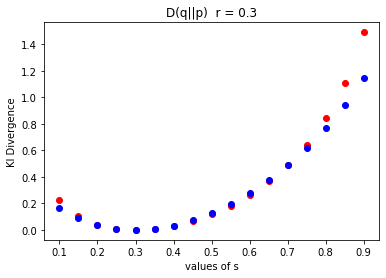

In [37]:
r = 0.3
s = [0.1,0.15, 0.2, 0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9]
for i in s:
    divergence1 = q7aRelativeEntropy(np.array([r, 1-r]), np.array([i, 1-i]))
    plt.plot(i, divergence1, 'ro')
    #print(divergence1)
plt.xlabel("values of s")
plt.ylabel("Kl Divergence")
plt.title("D(p||q)  r = {}".format(r))
for i in s:
    divergence2 = q7aRelativeEntropy(np.array([i, 1-i]), np.array([r, 1-r]))
    plt.plot(i, divergence2, 'bo')
    #print(divergence2)
plt.xlabel("values of s")
plt.ylabel("Kl Divergence")
plt.title("D(q||p)  r = {}".format(r))
plt.show()

#### (b) (ii)
From the above observations, we can clearly see that D(p||q) and D{q||p) are both non negative

#### (b) (iii)
From the above observations, we can say that D(p||q) $\not=$ D(q||p) and greater than 0 but for r = 0.3 and s = 0.3, both the divergences are same and equal to zero.

#### (b) (iv)

In [40]:
try:
    img1 = mpimg.imread(image1)
    img2 = mpimg.imread(image2)
except FileNotFoundError:
    print("Either {} or {} or both were not found! Input file has to be in the same directory as this code is!".format(image1, image2))
    sys.exit()
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        img1[i][j] = int(img1[i][j]*256)
        img2[i][j] = int(img2[i][j]*256)
print(img1)
width = 256
hist1 = np.zeros(width, float)
hist2 = np.zeros(width, float)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        hist1[int(img1[i][j])] += 1
        hist2[int(img2[i][j])] += 1
for i in range(width):
    hist1[i] /= (img1.shape[0]*img1.shape[1])
    hist2[i] /= (img2.shape[0]*img2.shape[1])
divergence1 = q7aRelativeEntropy(hist1, hist2)
divergence2 = q7aRelativeEntropy(hist2, hist1)
print("Divergence for image 1: ", divergence1)
print("Divergence for image 2: ", divergence2)

[[ 1.  3.  3. ...  2.  3.  1.]
 [ 3.  6.  4. ...  3.  4.  3.]
 [ 3.  5.  4. ... 22. 24. 12.]
 ...
 [28. 14. 10. ... 67. 71. 36.]
 [32. 15. 11. ... 76. 81. 42.]
 [18.  7.  5. ... 38. 43. 22.]]
Divergence for image 1:  0.015104015237387055
Divergence for image 2:  0.014409785833354494


KL divergence from above observation can be used to compare two images But this is not a real good way to measure the difference between the images because it doesn't take into consideration the spatial information of the images only the grayvalues information.

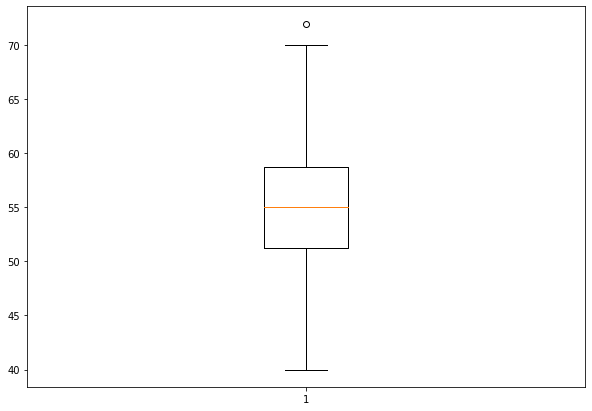

In [2]:
data = [49, 40, 59, 56, 55, 70, 49, 59, 55, 49, 58, 54, 55, 72, 51, 54, 56, 55, 65, 57, 61, 41, 52, 60, 49, 57, 46, 55, 63, 55]
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data)
plt.show()